## 1. INTRODUCCIÓN

Diccionario de datos:

- customerID: número de identificación único de cada cliente
- Churn: si el cliente dejó o no la empresa
- gender: género (masculino y femenino)
- SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- Partner: si el cliente tiene o no una pareja
- Dependents: si el cliente tiene o no dependientes
- tenure: meses de contrato del cliente
- PhoneService: suscripción al servicio telefónico
- MultipleLines: suscripción a más de una línea telefónica
- InternetService: suscripción a un proveedor de internet
- OnlineSecurity: suscripción adicional de seguridad en línea
- OnlineBackup: suscripción adicional de respaldo en línea
- DeviceProtection: suscripción adicional de protección del dispositivo
- TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
- StreamingTV: suscripción de televisión por cable
- StreamingMovies: suscripción de streaming de películas
- Contract: tipo de contrato
- PaperlessBilling: si el cliente prefiere recibir la factura en línea
- PaymentMethod: forma de pago
- Charges.Monthly: total de todos los servicios del cliente por mes
- Charges.Total: total gastado por el cliente

## 2. LIMPIEZA Y TRATAMIENTO DE DATOS

In [481]:
# Importación de librerías a utilizar en el proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from highlight_text import fig_text, ax_text
import seaborn as sns

In [482]:
# Importacion de la base de datos

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

datos = pd.read_json(url)

# Mostrar las primeras 5 filas del df
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


- Se observa que al ser importado el archivo json, se han generado columnas con diccionarios anidados, por lo que se tendrá que normalizarlas para poder estructurar mejor el dataframe y así poder analizarlo.

In [483]:
# Lista de columnas anidadas para normalizar
columnas_anidadas = ['customer', 'phone', 'internet', 'account']

# Separar las columnas no anidadas
otras_columnas = datos.drop(columns=columnas_anidadas)

# Normalizar cada columna anidada
dfs_normalizados = [
    pd.json_normalize(datos[col]).add_prefix(f'{col}_')
    for col in columnas_anidadas
]

# Concatenar todo en un solo DataFrame
datos_normalizados = pd.concat([otras_columnas] + dfs_normalizados, axis=1)


In [484]:
# Visualización de dataframe normalizado
datos_normalizados.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


- El dataframe ha sido normalizado y se pueden observar todas las columnas individuales con sus datos.
- Se realizará una exploración de los datos para conocer el dataframe y saber si requiere algún tipo de limpieza.

In [485]:
# Visualización de información general de dataframe
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [486]:
# Visualización de datos descriptivos de las columnas numéricas del df
datos_normalizados.describe()

,customer_SeniorCitizen,customer_tenure,account_Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [487]:
# Visualización del conteo de valores únicos por cada columna del df
for col in datos_normalizados.columns:
    print(datos_normalizados[col].value_counts())
    print('--')

customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64
--
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
--
customer_gender
Male      3675
Female    3592
Name: count, dtype: int64
--
customer_SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64
--
customer_Partner
No     3749
Yes    3518
Name: count, dtype: int64
--
customer_Dependents
No     5086
Yes    2181
Name: count, dtype: int64
--
customer_tenure
1     634
72    369
2     246
3     207
4     185
     ... 
28     60
39     59
44     54
36     50
0      11
Name: count, Length: 73, dtype: int64
--
phone_PhoneService
Yes    6560
No      707
Name: count, dtype: int64
--
phone_MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64
--
internet_InternetService
Fiber optic    3198
D

- La columna account_Charges.Total está como tipo object, debe ser cambiada a tipo float.
- En la columna 'Churn' hay 224 valores vacíos.
- En las columnas categóricas no se observa errores de escritura que ocasionen categorías repetidas.
- La columna 'CustomerID' no es relevante para el análisis de la evasión.

### 2.1 Cambio de tipo de datos
Se cambiará el tipo de datos de la columna 'account_Charges.Total' de object a float64, ya que esta columna almacena datos de dinero.

In [488]:
# Realizar una copia del dataframe normalizado para hacer todos los cambios
df_final = datos_normalizados.copy()

# Cambiar el tipo de dato de object a numeric(float)
df_final['account_Charges.Total'] = pd.to_numeric(df_final['account_Charges.Total'], errors='coerce')

In [489]:
# Verificar las estadísticas descriptivas de la columna
df_final['account_Charges.Total'].describe()

count    7256.000000
mean     2280.634213
std      2268.632997
min        18.800000
25%       400.225000
50%      1391.000000
75%      3785.300000
max      8684.800000
Name: account_Charges.Total, dtype: float64

### 2.2 Eliminación de valores vacíos en la columna 'Churn'
En la columna 'Churn' se encontraron 224 valores vacíos, que deben ser eliminados. Como el presente proyecto tiene como objetivo analizar las causas del abandono de clientes, y la cantidad de datos vacíos (224) es poca comparada con la cantidad total de los datos (7256), se eliminarán dichas filas que no tienen información sobre si el cliente dejó o no la empresa.

In [490]:
# Eliminar filas en las que el valor de 'Churn' es vacío
df_final = df_final[df_final['Churn'] != '']

In [491]:
# Verificación de la eliminación de las filas vacías
df_final['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### 2.3 Eliminación de columnas
Se eliminará la columna customerID, que no es relevante para el análisis del abandono de clientes en la empresa, ya que solo contiene códigos asigdanos a cada uno de los clientes.

In [492]:
# Eliminación de la columna CustomerID
df_final = df_final.drop(columns='customerID')

In [493]:
# Verificación de la eliminacion de la columna
df_final.columns

Index(['Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Monthly', 'account_Charges.Total'],
      dtype='object')

### 2.4 Renombrar columnas
Se renombrarán las columnas para poder estandarizar el formato de los nombres

In [494]:
# Diccionario con nombres a cambiar

nombres_nuevos = {
                'Churn':'churn',
                'customer_gender':'cust_gender',
                'customer_SeniorCitizen':'cust_senior_citizen',
                'customer_Partner':'cust_partner', 
                'customer_Dependents':'cust_dependents', 
                'customer_tenure':'cust_tenure',
                'phone_PhoneService':'phone_service', 
                'phone_MultipleLines':'phone_multiple_lines', 
                'internet_InternetService':'internet_service',
                'internet_OnlineSecurity':'online_security', 
                'internet_OnlineBackup':'online_backup',
                'internet_DeviceProtection':'device_protection', 
                'internet_TechSupport':'tech_support',
                'internet_StreamingTV':'streaming_tv', 
                'internet_StreamingMovies':'streaming_movies', 
                'account_Contract':'contract_type',
                'account_PaperlessBilling':'paperless_billing', 
                'account_PaymentMethod':'payment_method',
                'account_Charges.Monthly':'monthly_charges', 
                'account_Charges.Total':'total_charges'
                
}

In [495]:
# Renombrar los nombres de las columnas
df_final.rename(columns=nombres_nuevos, inplace=True)

In [496]:
# Verificación de columnas renombradas
df_final.columns

Index(['churn', 'cust_gender', 'cust_senior_citizen', 'cust_partner',
       'cust_dependents', 'cust_tenure', 'phone_service',
       'phone_multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract_type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

### 2.5 Creación de columna daily_charges
De acuerdo a la recomendación indicada en el challenge, se creará la columna daily_charges, que tendrá los valores diarios de facturación.

In [497]:
# Creación de la columna daily_charges
df_final['daily_charges'] = round(df_final['monthly_charges'] / 30, 2)

In [498]:
# Verificación de la creación de la columna daily_charges
df_final.head()

,churn,cust_gender,cust_senior_citizen,cust_partner,cust_dependents,cust_tenure,phone_service,phone_multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_method,monthly_charges,total_charges,daily_charges
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


### 2.6 Cambio de variables categóricas a variables numéricas
Las columnas 'churn', 'cust_gender', 'cust_partner', 'cust_dependents', 'phone_service' y 'paperless_billing' tienen valores categóricos que pueden ser cambiados a valores 0 y 1. Los cambios a realizar serán los siguientes:
- En las columnas 'churn', 'cust_partner', 'cust_dependents', 'phone_service' y 'paperless_billing' se dará un valor de 0 = 'No' y 1 = 'Yes'.
- En la columna 'cust_gender', se dará un valor de 0 = 'female' y 1 = 'male'

In [499]:
# Columnas a modificar
columnas_si_no = ['churn', 'cust_partner', 'cust_dependents', 'phone_service', 'paperless_billing']

In [500]:
# Cambio de tipo de dato en columnas seleccionadas con valores Yes/No

for col in columnas_si_no:
    df_final[col] = df_final[col].map({'No':0, 'Yes':1}).astype(int)

In [501]:
# Cambio de tipo de dato en columnas seleccionadas con valores Female/Male

df_final['cust_gender'] = df_final['cust_gender'].map({'Female':0, 'Male':1}).astype(int)

In [502]:
# Verificación de cambios
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   churn                 7043 non-null   int64  
 1   cust_gender           7043 non-null   int64  
 2   cust_senior_citizen   7043 non-null   int64  
 3   cust_partner          7043 non-null   int64  
 4   cust_dependents       7043 non-null   int64  
 5   cust_tenure           7043 non-null   int64  
 6   phone_service         7043 non-null   int64  
 7   phone_multiple_lines  7043 non-null   object 
 8   internet_service      7043 non-null   object 
 9   online_security       7043 non-null   object 
 10  online_backup         7043 non-null   object 
 11  device_protection     7043 non-null   object 
 12  tech_support          7043 non-null   object 
 13  streaming_tv          7043 non-null   object 
 14  streaming_movies      7043 non-null   object 
 15  contract_type         7043

### 2.7 Modificación de la columna internet_service a internet_type
La columna internet_service indica el tipo de conexión a internet que tiene el clientte (DSL o fibra óptica), por lo que se cambiará de nombre a internet_type para describir mejor su contenido. Las filas que tengan 'No' se cambiarán a 'No internet service'.

In [503]:
# Valores actuales de la columna internet_service
df_final['internet_service'].value_counts()

internet_service
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [504]:
# Cambio de nombre de columna internet_service
df_final.rename(columns={'internet_service':'internet_type'}, inplace=True)

In [505]:
# Verificación del renombre de la columna
df_final.columns

Index(['churn', 'cust_gender', 'cust_senior_citizen', 'cust_partner',
       'cust_dependents', 'cust_tenure', 'phone_service',
       'phone_multiple_lines', 'internet_type', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract_type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'daily_charges'],
      dtype='object')

In [506]:
# Cambio de dato en las filas donde internet_type = 'No'
df_final['internet_type'] = df_final['internet_type'].replace('No', 'No internet service')

In [507]:
# Verificación de cambio de datos en la columna internet_type
df_final['internet_type'].value_counts()

internet_type
Fiber optic            3096
DSL                    2421
No internet service    1526
Name: count, dtype: int64

Los conteos de los valores antes y después del cambio no han sido alterados.

### 2.8 Creación de columna internet_service
Se creará la columna internet_service que tenga valores 1 = 'Yes' y 0 ='No' de acuerdo a los valores correspondientes en la columna internet_type:
- Cuando el valor de internet_type sea 'Fiber optic' o 'DSL', el valor de la columna internet_service será 1.
- Cuando el valor de internet_type sea 'No internet service', el valor de la columna internet_service será 0.

En el dataframe, la columna internet_service será ubicada antes de la columna internet_type.

In [508]:
# Creación de la columna internet_service y sus valores
df_final['internet_service'] = np.where(df_final['internet_type'] == 'No internet service', 0, 1)


In [509]:
# Verificación de valores dentro de la columna internet_service
df_final['internet_service'].value_counts()

internet_service
1    5517
0    1526
Name: count, dtype: int64

Los valores 1 y 0 coinciden con los valores de la columna internet_type, según lo establecido.

In [510]:
# Cambiar de lugar la columna internet_service

nombre_columna = df_final.columns[-1]
col_int_service = df_final.pop(nombre_columna)
df_final.insert(8,nombre_columna, col_int_service)

In [511]:
# Verificación de reposicionamiento de columna internet_service
df_final.head()

,churn,cust_gender,cust_senior_citizen,cust_partner,cust_dependents,cust_tenure,phone_service,phone_multiple_lines,internet_service,internet_type,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_method,monthly_charges,total_charges,daily_charges
0,0,0,0,1,1,9,1,No,1,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0,1,0,0,0,9,1,Yes,1,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,1,1,0,0,0,4,1,No,1,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,1,1,1,1,0,13,1,No,1,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,1,0,1,1,0,3,1,No,1,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


### 2.9 Verificación de distribución de cust_tenure
Se observará la distribución de la variable cust_tenure para poder identificar los intervalos más adecuados para posteriormente realizar el análisis.

In [512]:
# Analisis descriptivo de la columna 'cust_tenure'
df_final['cust_tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: cust_tenure, dtype: float64

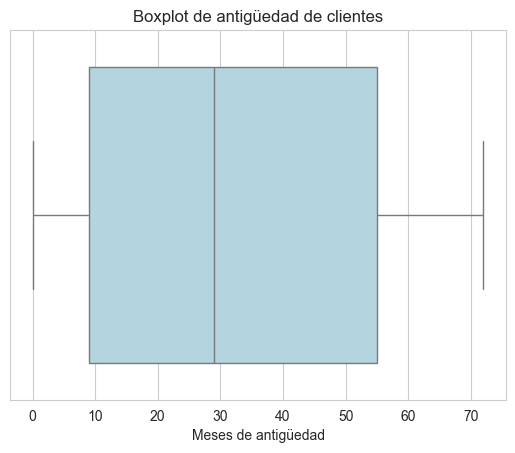

In [513]:
# Boxplot de la columna 'cust_tenure'
sns.boxplot(x=df_final['cust_tenure'], color='lightblue')

plt.title('Boxplot de antigüedad de clientes')
plt.xlabel('Meses de antigüedad')
plt.show()


- La distribución de datos de la variable 'cust_tenure' no tiene datos atípicos.
- Se determinará en cuantos intervalos, bins o clases se debe segmentar la variable 'cust_tenure' para poder ser analizada posteriormente. Para esto, se utilizará la ley de sturges.

In [514]:
# Ley de Sturges
n = len(df_final['cust_tenure'])
intervalos_sturges = int(np.ceil(np.log2(n) + 1))
intervalos_sturges

14

- El número de intervalos a considerar en la variable 'cust_tenure' es de 14.

In [515]:
# Cálculo de los límites de los intervalos
valor_min = df_final['cust_tenure'].min()
valor_max = df_final['cust_tenure'].max()
num_intervalos = 14

# Ancho de cada intervalo
limites_intervalo = np.round(np.linspace(valor_min, valor_max, num_intervalos + 1)).astype(int)
limites_intervalo

array([ 0,  5, 10, 15, 21, 26, 31, 36, 41, 46, 51, 57, 62, 67, 72])

In [516]:
limites_intervalo = [i+1 if i > 0 else i for i in limites_intervalo]
limites_intervalo

[np.int64(0),
 np.int64(6),
 np.int64(11),
 np.int64(16),
 np.int64(22),
 np.int64(27),
 np.int64(32),
 np.int64(37),
 np.int64(42),
 np.int64(47),
 np.int64(52),
 np.int64(58),
 np.int64(63),
 np.int64(68),
 np.int64(73)]

In [517]:
# Crear una nueva columna en df_final en el que se tengan los intervalos de 'cust_tenure'

# Creación de etiquetas (valores de los intervalos)
etiquetas = [f'{limites_intervalo[i]}-{limites_intervalo[i+1]-1}' for i in range(len(limites_intervalo)-1)]
etiquetas

['0-5',
 '6-10',
 '11-15',
 '16-21',
 '22-26',
 '27-31',
 '32-36',
 '37-41',
 '42-46',
 '47-51',
 '52-57',
 '58-62',
 '63-67',
 '68-72']

In [518]:
# Agrupar valores de 'cust_tenure' en una nueva columna
df_final['cust_tenure_int'] = pd.cut(df_final['cust_tenure'], bins=limites_intervalo, labels=etiquetas, right=False)

In [519]:
# Cambiar de lugar la columna cust_tenure_int

nombre_columna1 = df_final.columns[-1]
col_cust_tenure_int = df_final.pop(nombre_columna1)
df_final.insert(6,nombre_columna1, col_cust_tenure_int)

In [520]:
# Verificación del cambio de lugar de la columna cust_tenure_int
df_final.head()

,churn,cust_gender,cust_senior_citizen,cust_partner,cust_dependents,cust_tenure,cust_tenure_int,phone_service,phone_multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_method,monthly_charges,total_charges,daily_charges
0,0,0,0,1,1,9,6-10,1,No,1,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0,1,0,0,0,9,6-10,1,Yes,1,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,1,1,0,0,0,4,0-5,1,No,1,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,1,1,1,1,0,13,11-15,1,No,1,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,1,0,1,1,0,3,0-5,1,No,1,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


### 2.10 Verificación del dataframe final

In [521]:
# Verificación del dataframe final
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   churn                 7043 non-null   int64   
 1   cust_gender           7043 non-null   int64   
 2   cust_senior_citizen   7043 non-null   int64   
 3   cust_partner          7043 non-null   int64   
 4   cust_dependents       7043 non-null   int64   
 5   cust_tenure           7043 non-null   int64   
 6   cust_tenure_int       7043 non-null   category
 7   phone_service         7043 non-null   int64   
 8   phone_multiple_lines  7043 non-null   object  
 9   internet_service      7043 non-null   int64   
 10  internet_type         7043 non-null   object  
 11  online_security       7043 non-null   object  
 12  online_backup         7043 non-null   object  
 13  device_protection     7043 non-null   object  
 14  tech_support          7043 non-null   object  
 15  streaming

In [522]:
# Reseteo del índice
df_final.reset_index(drop=True, inplace=True)

In [523]:
# Verificacion del dataframe final
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   churn                 7043 non-null   int64   
 1   cust_gender           7043 non-null   int64   
 2   cust_senior_citizen   7043 non-null   int64   
 3   cust_partner          7043 non-null   int64   
 4   cust_dependents       7043 non-null   int64   
 5   cust_tenure           7043 non-null   int64   
 6   cust_tenure_int       7043 non-null   category
 7   phone_service         7043 non-null   int64   
 8   phone_multiple_lines  7043 non-null   object  
 9   internet_service      7043 non-null   int64   
 10  internet_type         7043 non-null   object  
 11  online_security       7043 non-null   object  
 12  online_backup         7043 non-null   object  
 13  device_protection     7043 non-null   object  
 14  tech_support          7043 non-null   object  
 15  stre

En esta primera etapa se ha concluido la limpieza de datos, en la que se eliminaron valores faltantes, se creó la columna daily_charges, se renombraron las columnas, se imputaron valores numéricos a las variables categóricas dicotómicas identificadas y se categorizó la variable cust_tenure en intervalos utilizando la ley de sturges.
Con el dataframe final listo se procederá a realizar el análisis exploratorio de datos.

El diccionario del dataframe final es el siguiente:
- 'churn': si el cliente dejó o no la empresa. Sí = 1 y No = 0.
- 'cust_gender': género del cliente. Masculino = 1 y Femenino = 0.
- 'cust_senior_citizen': información sobre si un cliente tiene o no una edad igual o mayor a 65 años. Sí = 1 y No = 0.
- 'cust_partner': si el cliente tiene o no una pareja. Sí = 1 y No = 0.
- 'cust_dependents': si el cliente tiene o no dependientes. Sí = 1 y No = 0.
- 'cust_tenure': meses de contrato del cliente.
- 'cust_tenure_int': intervalo de antiguedad en meses a la que pertenece el valor de 'cust_tenure'
- 'phone_service': suscripción al servicio telefónico. Sí = 1 y No = 0.
- 'phone_multiple_lines': suscripción a más de una línea telefónica.
- 'internet_service': suscripción al servicio de internet. Sí = 1 y No = 0.
- 'internet_type': tipo de servicio de internet contratado.
- 'online_security': suscripción adicional de seguridad en línea.
- 'online_backup': suscripción adicional de respaldo en línea.
- 'device_protection': suscripción adicional de protección del dispositivo.
- 'tech_support': suscripción adicional de soporte técnico, menor tiempo de espera.
- 'streaming_tv': suscripción de televisión por cable.
- 'streaming_movies': suscripción de streaming de películas.
- 'contract_type': tipo de contrato.
- 'paperless_billing': si el cliente prefiere recibir la factura en línea.  Sí = 1 y No = 0.
- 'payment_method': forma de pago.
- 'monthly_charges': total de todos los servicios del cliente por mes.
- 'total_charges': total gastado por el cliente.
- 'daily_charges': total de todos los servicios del cliente por día.

In [524]:
df_final

,churn,cust_gender,cust_senior_citizen,cust_partner,cust_dependents,cust_tenure,cust_tenure_int,phone_service,phone_multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_method,monthly_charges,total_charges,daily_charges
0,0,0,0,1,1,9,6-10,1,No,1,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30,2.19
1,0,1,0,0,0,9,6-10,1,Yes,1,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40,2.00
2,1,1,0,0,0,4,0-5,1,No,1,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,1,1,1,1,0,13,11-15,1,No,1,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,1,0,1,1,0,3,0-5,1,No,1,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,0,13,11-15,1,No,1,...,No,Yes,No,No,One year,0,Mailed check,55.15,742.90,1.84
7039,1,1,0,1,0,22,22-26,1,Yes,1,...,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70,2.84
7040,0,1,0,0,0,2,0-5,1,No,1,...,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75,1.68
7041,0,1,0,1,1,67,63-67,1,No,1,...,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65,2.26


## 3. FUNCIONES
Aquí se incluirán las funciones que serán utilizadas en el análisis exploratorio de datos.

### 3.1 Creación de dataframes para análisis de abandono
La siguiente función tiene como objetivo crear dataframes a partir del dataframe limpio (df_final) para realizar análisis de cantidad y porcentajes de abandono de clientes de acuerdo a parámetros elegidos.

In [525]:
# Funcion para crear dataframes necesarios para análisis de abandono de clientes
def crear_df_abandono (indice, nombre_indice, nueva_columna_pct, diccionario_renombres = None):
    """
    Crea un dataframe con cantidad y porcentaje de clientes que abandonaron el servicio de acuerdo a diferentes parámetros.
    """
    # Crear el df con valores de abandono ('churn') en las columnas y el parámetro elegido en el índice
    df = pd.crosstab(index=indice, columns=df_final['churn'], rownames=[nombre_indice], colnames=['Abandono'])

    # Renombrar los valores de los indices y las columnas
    if diccionario_renombres is not None:
        df.rename(index=diccionario_renombres, inplace=True)
    df.rename(columns={0:'No', 1:'Si'}, inplace=True)

    # Crear la columna %_abandono_total
    # Los valores indican la contribución de abandonos de cada uno de los tipos de contrato al porcentaje total de abandonos
    df['%_abandono_total'] = round(df['Si'] * 100 / df['Si'].sum(), 2)

    # Crear columna de porcetnaje de abandono por valor del parámetro elegido (índice)
    df[nueva_columna_pct] = round(df['Si'] * 100 / (df['No'] + df['Si']), 2)

    return df

## 4. ANÁLISIS EXPLORATORIO DE DATOS


Esta etapa se centrará en realizar un análisis para poder determinar los factores que han influido en el abandono de clientes. Las principales preguntas a responder son las siguientes:

- ¿Cuál es la tasa de abandono de clientes?
- ¿Qué tipo de contrato tenían los clientes que abandonaron los servicios?
- ¿Cuál es el método de pago que tenían los clientes que abanodonaron los servicios?
- ¿Qué perfil tiene el cliente que abandona el servicio?
- ¿Es el costo del servicio un factor importante para que un cliente abandone?


### 4.1 Descripción de las variables
Se hará un análisis descriptivo de las variables numéricas, en las que se calculará la media, mediana y desviación estándar.

In [526]:
df_final.describe()

,churn,cust_gender,cust_senior_citizen,cust_partner,cust_dependents,cust_tenure,phone_service,internet_service,paperless_billing,monthly_charges,total_charges,daily_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.783331,0.592219,64.761692,2283.300441,2.158675
std,0.441561,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.412004,0.491457,30.090047,2266.771362,1.003088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,1.000000,0.000000,35.500000,401.450000,1.180000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,70.350000,1397.475000,2.340000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,2.990000
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


En el análisis de las variables cuantitativas se observa lo siguiente:

- La variable 'churn', que indica el abandono de clientes con valores 0 y 1 tiene una media de 0.27, por lo que casi el 30% de los clientes han abandonado los servicios de la empresa.
- No hay diferencia entre la cantidad de hombres y mujeres que han contratado los servicios, pues la media está cercana al 50% en la variabla 'cust_gender'.
- Variable 'cust_senior_citizen': Alrededor el 16% de clientes son mayores de 65 años.
- Variable 'cust_partner': Hay ligeramente más clientes solteros que con pareja (48%).
- Variable 'cust_dependents': Casi el 30% de los clientes tienen hijos.
- Variable 'cust_tenure': La media de tiempo de contrato es de 32 meses, y la mediana es de 29 meses. Un cuarto del total de clientes tiene una permanencia en la empresa de 9 meses a menos.
- Variable 'phone_service': El 90% de los clientes cuenta con el servicio telefónico.
- Variable 'internet_service': El 78% de los clientes cuenta con el servicio de internet.
- Variable 'paperless_billing': Casi el 60% de los clientes recibe la factura de manera digital.
- Variable 'monthly_cahrges': El cargo mensual promedio por los servicios contratados por los clientes es de $64.76, y la mediana es de $70.35.
- Variable 'total_charges' y variable 'daily_charges' presentan una alta variación.


### 4.2 Tasa de abandono de clientes

In [527]:
# Crear un nuevo dataframe con los valores de abandono de clientes
df_abandono = pd.DataFrame()
df_abandono['cantidad'] = df_final['churn'].value_counts()
df_abandono['porcentaje'] = df_abandono['cantidad'] * 100 / df_abandono['cantidad'].sum()
df_abandono['porcentaje'] = df_abandono['porcentaje'].map(lambda x: f'{x:.2f}%')
df_abandono.index.name = 'abandono'
df_abandono.rename(index={0:'No', 1:'Si'}, inplace=True)
df_abandono

,cantidad,porcentaje
abandono,,
No,5174,73.46%
Si,1869,26.54%


- La tasa de abandono de clientes de la empresa es del 26.54%. Se considera que esta tasa es alta, ya que implica que más de la cuarta parte del total de los clientes ha abandonado los servicios de la empresa.
- No se tiene información del periodo de tiempo en que han ocurrido estos abandonos.

### 4.3 Tasa de abandono por tipo de contrato

Se realizará un análisis para verificar si el tipo de contrato al que están sujetos los clientes es un factor relacionado en el abandono.

In [528]:
# Para crear el df para el análisis se utilizará la función en el acápite 3.1

# Diccionario de nombres a considerar en los índices del df a crear
valores_renombrar = {'Month-to-month':'Mensual', 'One year':'Un año', 'Two year':'Dos años'}

# Creación del df
df_abandono_contrato = crear_df_abandono(df_final['contract_type'], 'Tipo de contrato','%_abandono_contrato', diccionario_renombres=valores_renombrar)
df_abandono_contrato

Abandono,No,Si,%_abandono_total,%_abandono_contrato
Tipo de contrato,,,,
Mensual,2220,1655,88.55,42.71
Un año,1307,166,8.88,11.27
Dos años,1647,48,2.57,2.83


In [529]:
# Ordenamiento de df
df_abandono_contrato.sort_values(by='No', ascending=False, inplace=True)

In [530]:
# Creación de dataframe para gráfico de barras apiladas
df_abandono_contrato1 = df_abandono_contrato.drop(labels=['%_abandono_total', '%_abandono_contrato'], axis=1)
df_abandono_contrato1

Abandono,No,Si
Tipo de contrato,,
Mensual,2220,1655
Dos años,1647,48
Un año,1307,166


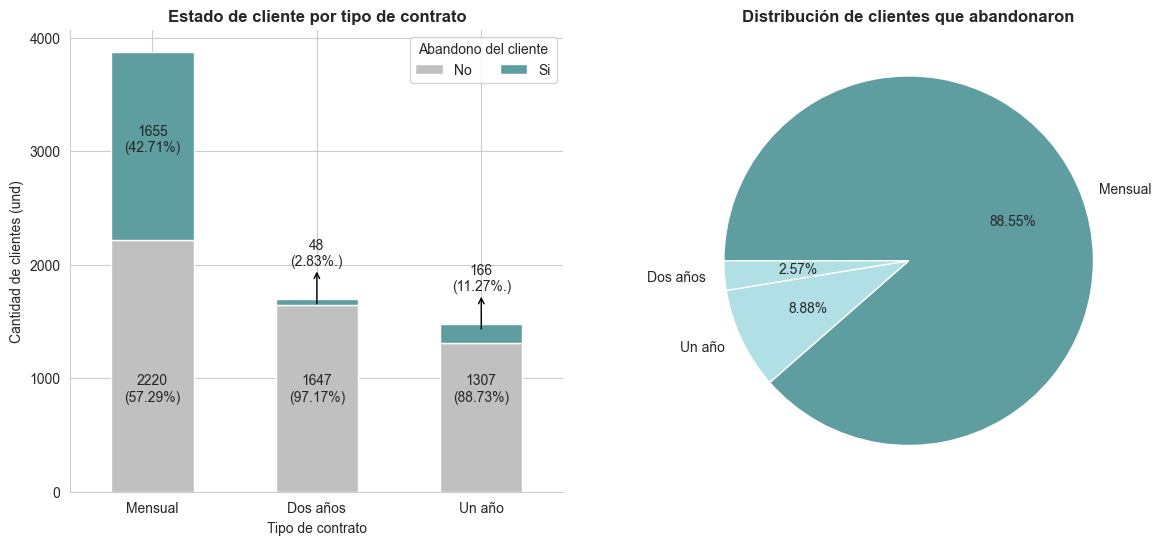

In [531]:
# Realizar las gráficas

# Estilo de la gráfica
sns.set_style('whitegrid')

# Creación del lienzo con 2 gráficas
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))


# Realizar la gráfica de barras apiladas
df_abandono_contrato1.plot(kind='bar', stacked=True, color=['silver', 'cadetblue'], ax=ax1)

# Configurar el título y los ejes
ax1.set_title('Estado de cliente por tipo de contrato', weight='bold')
ax1.set_ylabel('Cantidad de clientes (und)')
ax1.set_yticks([0, 1000, 2000, 3000, 4000])
ax1.tick_params(axis='x', labelrotation=0)

# Obtención y configuración de los spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Anotaciones
# Valores de las barras
for i in range(3):
    ax1.text(x=i, 
            y=800, 
            s=f'{df_abandono_contrato['No'].iloc[i]}\n({100 - df_abandono_contrato['%_abandono_contrato'].iloc[i]}%)',
            ha='center'
            )

for j in range(3):
    if j == 0:
        ax1.text(x=j, 
                y=3000, 
                s=f'{df_abandono_contrato['Si'].iloc[j]}\n({df_abandono_contrato['%_abandono_contrato'].iloc[j]}%)',
                ha='center'
                )
    else:
        ax1.annotate(text=f'{df_abandono_contrato['Si'].iloc[j]}\n({df_abandono_contrato['%_abandono_contrato'].iloc[j]}%.)',
                xy=(j,df_abandono_contrato['No'].iloc[j] + df_abandono_contrato['Si'].iloc[j] - 40),
                xytext=(j,df_abandono_contrato['No'].iloc[j] + df_abandono_contrato['Si'].iloc[j] + 300),
                ha='center',
                arrowprops=dict(arrowstyle="<-", color='black', shrinkA=0, shrinkB=0))

# Configuración de la leyenda
ax1.legend(title='Abandono del cliente',loc='upper right', ncol=2)

# Reordenamiento del df para realizar el gráfico de torta
df_abandono_contrato2 = df_abandono_contrato.sort_values(by='%_abandono_total', ascending=False)

# Gráfico de torta
colores= []
for indice in df_abandono_contrato2.index:
    if indice == 'Mensual':
        colores.append('cadetblue')
    else:
        colores.append('powderblue')

ax2.pie(df_abandono_contrato2['Si'], labels=df_abandono_contrato2.index, autopct='%1.2f%%', colors=colores, counterclock=False, startangle=180)

ax2.set_title('Distribución de clientes que abandonaron', weight='bold')


plt.show()

- Se observa que casi el 90% de los clientes que abandonaron la empresa tienen contratos mensuales, y los que tenían un contrato a mayor plazo abandonaron en menor porporción.
- De la totalidad de clientes con contrato mensual, el 42.71% ha abandonado los servicios de la empresa.
- Se debe revisar si la empresa cuenta con un programa de fidelización del cliente, en el que se incentive la permanencia de los clientes con contratos cortos.
- Se debe revisar los índices de satisfacción o el número de quejas recibidas, poniendo énfasis en el grupo de clientes que tienen contratos mensuales.
- Se debería revisar la data del tiempo en el cual se relizaron los abandonos de los clientes, para dar una mejor perspectiva de la información.

### 4.4 Tasa de abandono por medio de pago

In [532]:
# Creación del df de abandono de clientes por método de pago con la función del acápite 3.1

# Diccionario de nombres a considerar en los valores del índice
dic_renombrar1 = {
                'Bank transfer (automatic)': 'Transf. bancaria (auto)', 
                'Credit card (automatic)': f'Tarjeta de crédito (auto)',
                'Electronic check': 'Cheque electrónico',
                'Mailed check': 'Cheque por correo'
                }

# Creación del df
df_abandono_pago = crear_df_abandono(df_final['payment_method'], 'Método de pago', '%_abandono_metodo', diccionario_renombres=dic_renombrar1)

df_abandono_pago

Abandono,No,Si,%_abandono_total,%_abandono_metodo
Método de pago,,,,
Transf. bancaria (auto),1286,258,13.80,16.71
Tarjeta de crédito (auto),1290,232,12.41,15.24
Cheque electrónico,1294,1071,57.30,45.29
Cheque por correo,1304,308,16.48,19.11


In [533]:
# Reordenamiento de valores de mayor a menor cantidad de clientes que abandonaron el servicio
df_abandono_pago.sort_values(by='Si', ascending=False, inplace=True)
df_abandono_pago

Abandono,No,Si,%_abandono_total,%_abandono_metodo
Método de pago,,,,
Cheque electrónico,1294,1071,57.30,45.29
Cheque por correo,1304,308,16.48,19.11
Transf. bancaria (auto),1286,258,13.80,16.71
Tarjeta de crédito (auto),1290,232,12.41,15.24


In [534]:
# Creación de dataframe para gráfico de barras apiladas
df_abandono_pago1 = df_abandono_pago.drop(labels=['%_abandono_total', '%_abandono_metodo'], axis=1)

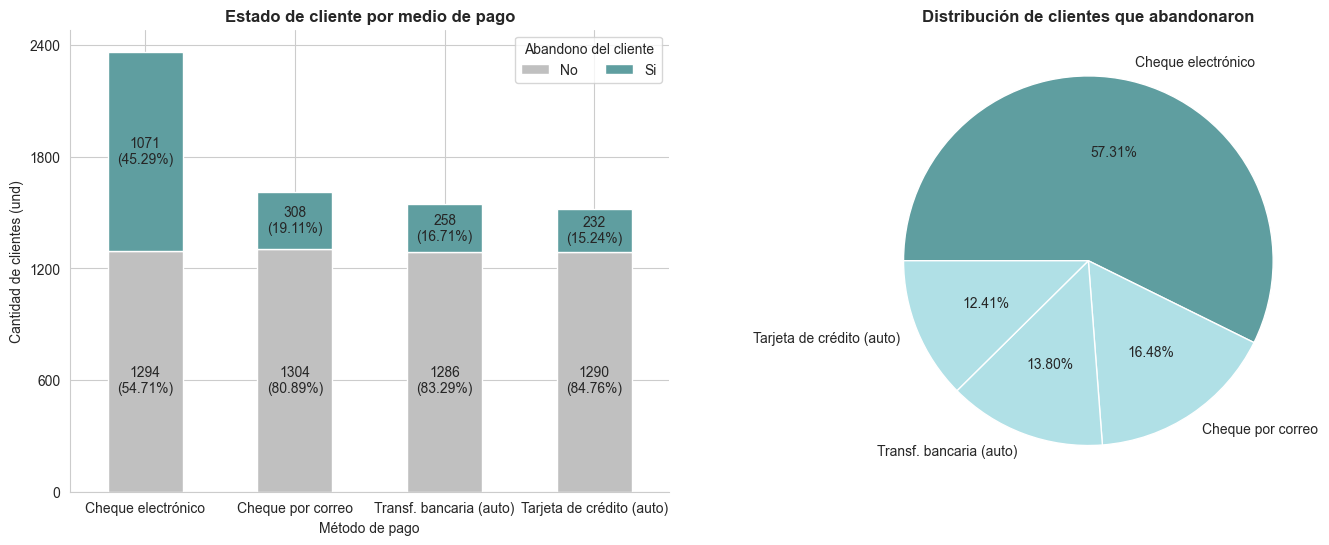

In [535]:
# Realizar las gráficas

# Estilo de la gráfica
sns.set_style('whitegrid')

# Creación del lienzo con 2 gráficas
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(17,6))


# Realizar la gráfica de barras apiladas
df_abandono_pago1.plot(kind='bar', stacked=True, color=['silver', 'cadetblue'], ax=ax1)

# Configurar el título y los ejes
ax1.set_title('Estado de cliente por medio de pago', weight='bold')
ax1.set_ylabel('Cantidad de clientes (und)')
ax1.set_yticks([0, 600, 1200, 1800, 2400])
ax1.tick_params(axis='x', labelrotation=0)

# Obtención y configuración de los spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Anotaciones
# Valores de las barras
for i in range(4):
    ax1.text(x=i, 
            y=600, 
            s=f'{df_abandono_pago['No'].iloc[i]}\n({round(100 - df_abandono_pago['%_abandono_metodo'].iloc[i], 2)}%)',
            ha='center',
            va='center'
            )

for i in range(4):
    ax1.text(x=i, 
            y=df_abandono_pago1['No'].iloc[i] + (df_abandono_pago1['Si'].iloc[i]/2), 
            s=f'{df_abandono_pago['Si'].iloc[i]}\n({df_abandono_pago['%_abandono_metodo'].iloc[i]}%)',
            ha='center',
            va='center'
            )

# Configuración de la leyenda
ax1.legend(title='Abandono del cliente',loc='upper right', ncol=2)


# Gráfico de torta
colores= []
for indice in df_abandono_pago.index:
    if indice == 'Cheque electrónico':
        colores.append('cadetblue')
    else:
        colores.append('powderblue')

ax2.pie(df_abandono_pago['%_abandono_total'], labels=df_abandono_pago.index, autopct='%1.2f%%', colors=colores, counterclock=False, startangle=180)

ax2.set_title('Distribución de clientes que abandonaron', weight='bold')


plt.show()

- Los métodos de pago automáticos tienen menor tasa de abandono de clientes, posiblemente porque no implican la inversión de tiempo de los mismos en trámites.
- Más de la mitad de clientes que abandonaron la empresa pagan con cheque electrónico. Debería invertigarse si el proceso es muy engorroso o si hay fallas o dificultades técnicas que pueden solucionarse para facilitarle el trámite al cliente.

### 4.5 Perfil del cliente que abandona los servicios
Se realizará un perfil del cliente que abandona los servicios de la empresa, teniendo en cuenta su género, si es mayor de 65 años, si tiene pareja o hijos y el tiempo en el que se encuentra usando los servicios de la empresa.

In [592]:
# Variables categóricas del cliente: género, mayor de 65 años, pareja, hijos, antiguedad

# Crear dataframe con data de abandono por características del cliente utilizando la funcion del acapite 3.1
# Valores para renombrar los índices de los dataframes a crear
valores_renombrar2 = {0: 'Femenino', 1:'Masculino'} # Variable cust_gender
valores_renombrar3 = {0:'Menor de 65', 1:'65 o mayor'} # Variable cust_senior_citizen
valores_renombrar4 = {0:'Sin pareja', 1:'Con pareja'} # Variable cust_partner
valores_renombrar5 = {0:'Sin hijos', 1:'Con hijos'} # Variable cust_dependents
 


df_abandono_cliente_genero = crear_df_abandono(df_final['cust_gender'], 'Género','%_abandono_genero', diccionario_renombres=valores_renombrar2)
df_abandono_cliente_senior = crear_df_abandono(df_final['cust_senior_citizen'], 'Edad', '%_abandono_senior', diccionario_renombres=valores_renombrar3)
df_abandono_cliente_pareja = crear_df_abandono(df_final['cust_partner'], 'Situación personal', '%_abandono_pareja', diccionario_renombres=valores_renombrar4)
df_abandono_cliente_hijos = crear_df_abandono(df_final['cust_dependents'], 'Situación parental', '%_abandono_hijos', diccionario_renombres=valores_renombrar5)
df_abandono_cliente_antiguedad = crear_df_abandono(df_final['cust_tenure_int'], 'Meses de antiguedad', '%_abandono_antiguedad')

In [593]:
# Creación de dataframes con información para la gráfica de barras apiladas
df_abandono_cliente_genero1 = df_abandono_cliente_genero.drop(labels=['%_abandono_total', '%_abandono_genero'], axis=1)
df_abandono_cliente_senior1 = df_abandono_cliente_senior.drop(labels=['%_abandono_total', '%_abandono_senior'], axis=1)
df_abandono_cliente_pareja1 = df_abandono_cliente_pareja.drop(labels=['%_abandono_total', '%_abandono_pareja'], axis=1)
df_abandono_cliente_hijos1 = df_abandono_cliente_hijos.drop(labels=['%_abandono_total', '%_abandono_hijos'], axis=1)
df_abandono_cliente_antiguedad1 = df_abandono_cliente_antiguedad.drop(labels=['%_abandono_total', '%_abandono_antiguedad'], axis=1)

In [550]:
# Visualización de df_abandono_cliente_genero
df_abandono_cliente_genero

Abandono,No,Si,%_abandono_total,%_abandono_genero
Género,,,,
Femenino,2549,939,50.24,26.92
Masculino,2625,930,49.76,26.16


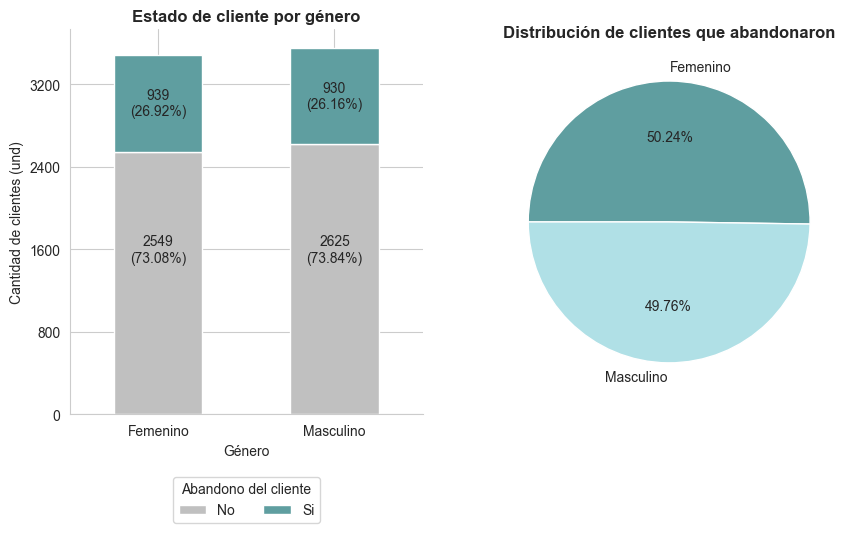

In [552]:
# Realizar las gráficas de abandono por género del cliente

# Estilo de la gráfica
sns.set_style('whitegrid')

# Creación del lienzo con 2 gráficas
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))


# Realizar la gráfica de barras apiladas
df_abandono_cliente_genero1.plot(kind='bar', stacked=True, color=['silver', 'cadetblue'], ax=ax1)

# Configurar el título y los ejes
ax1.set_title('Estado de cliente por género', weight='bold')
ax1.set_ylabel('Cantidad de clientes (und)')
ax1.set_yticks([0, 800, 1600, 2400, 3200])
ax1.tick_params(axis='x', labelrotation=0)

# Obtención y configuración de los spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Anotaciones
# Valores de las barras
for i in range(len(df_abandono_cliente_genero.index)):
    ax1.text(x=i, 
            y=1600, 
            s=f'{df_abandono_cliente_genero['No'].iloc[i]}\n({round(100 - df_abandono_cliente_genero['%_abandono_genero'].iloc[i], 2)}%)',
            ha='center',
            va='center'
            )

for i in range(len(df_abandono_cliente_genero.index)):
    ax1.text(x=i, 
            y=df_abandono_cliente_genero['No'].iloc[i] + (df_abandono_cliente_genero['Si'].iloc[i]/2), 
            s=f'{df_abandono_cliente_genero['Si'].iloc[i]}\n({df_abandono_cliente_genero['%_abandono_genero'].iloc[i]}%)',
            ha='center',
            va='center'
            )

# Configuración de la leyenda
ax1.legend(title='Abandono del cliente',loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)


# Gráfico de torta
colores= []
for indice in df_abandono_cliente_genero.index:
    if indice == 'Femenino':
        colores.append('cadetblue')
    else:
        colores.append('powderblue')

ax2.pie(df_abandono_cliente_genero['%_abandono_total'], labels=df_abandono_cliente_genero.index, autopct='%1.2f%%', colors=colores, counterclock=False, startangle=180)

ax2.set_title('Distribución de clientes que abandonaron', weight='bold')


plt.show()

- Los porcentajes de abandono en el género femenino y masculino son similares (26.92% y 26.16%, respectivamente).
- Del total de abandonos, aproximadamente cada mitad corresponde a cada género.
- El género del cliente no es un factor relevante que influya en el abandono de los servicios.

In [560]:
#  Visualización de df_abandono_cliente_senior
df_abandono_cliente_senior

Abandono,No,Si,%_abandono_total,%_abandono_senior
Edad,,,,
Menor de 65,4508,1393,74.53,23.61
65 o mayor,666,476,25.47,41.68


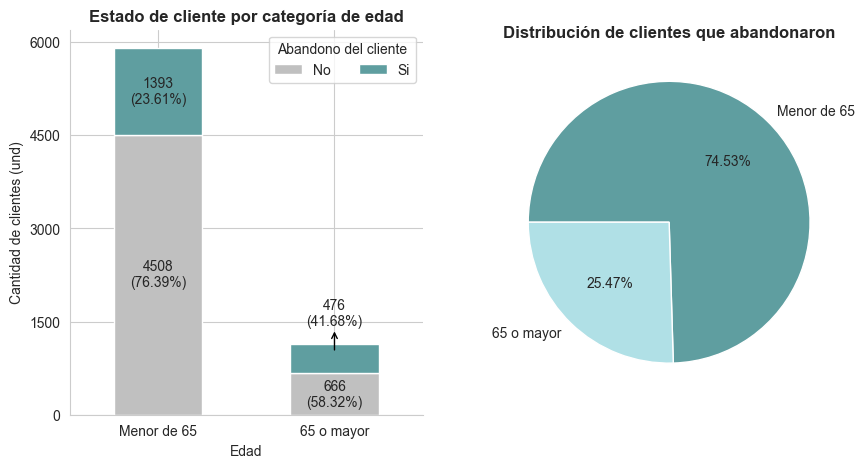

In [ ]:
# Realizar las gráficas de abandono por categoría de edad del cliente

# Estilo de la gráfica
sns.set_style('whitegrid')

# Creación del lienzo con 2 gráficas
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))


# Realizar la gráfica de barras apiladas
df_abandono_cliente_senior1.plot(kind='bar', stacked=True, color=['silver', 'cadetblue'], ax=ax1)

# Configurar el título y los eies
ax1.set_title('Estado de cliente por categoría de edad', weight='bold')
ax1.set_ylabel('Cantidad de clientes (und)')
ax1.set_yticks([0, 1500, 3000, 4500, 6000])
ax1.tick_params(axis='x', labelrotation=0)

# Obtención y configuración de los spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Anotaciones
# Valores de las barras
for i in range(len(df_abandono_cliente_senior.index)):
    ax1.text(x=i, 
            y=df_abandono_cliente_senior['No'].iloc[i] / 2, 
            s=f'{df_abandono_cliente_senior['No'].iloc[i]}\n({round(100 - df_abandono_cliente_senior['%_abandono_senior'].iloc[i], 2)}%)',
            ha='center',
            va='center'
            )

for i in range(len(df_abandono_cliente_senior.index)):
    if i == 0:
        ax1.text(x=i, 
                y=df_abandono_cliente_senior['No'].iloc[i] + (df_abandono_cliente_senior['Si'].iloc[i]/2), 
                s=f'{df_abandono_cliente_senior['Si'].iloc[i]}\n({df_abandono_cliente_senior['%_abandono_senior'].iloc[i]}%)',
                ha='center',
                va='center'
                )
    else:
        ax1.annotate(text=f'{df_abandono_cliente_senior['Si'].iloc[i]}\n({df_abandono_cliente_senior['%_abandono_senior'].iloc[i]}%)',
                xy=(i,df_abandono_cliente_senior['No'].iloc[i] + df_abandono_cliente_senior['Si'].iloc[i] - 100),
                xytext=(i,df_abandono_cliente_senior['No'].iloc[i] + df_abandono_cliente_senior['Si'].iloc[i] + 300),
                ha='center',
                arrowprops=dict(arrowstyle="<-", color='black', shrinkA=0, shrinkB=0))
        

# Configuración de la leyenda
ax1.legend(title='Abandono del cliente', loc='upper right', ncol=2)


# Gráfico de torta
colores= []
for indice in df_abandono_cliente_senior.index:
    if indice == 'Menor de 65':
        colores.append('cadetblue')
    else:
        colores.append('powderblue')

ax2.pie(df_abandono_cliente_senior['%_abandono_total'], labels=df_abandono_cliente_senior.index, autopct='%1.2f%%', colors=colores, counterclock=False, startangle=180)

ax2.set_title('Distribución de clientes que abandonaron', weight='bold')


plt.show()

- A pesar de que más del 40% de clientes de 65 años o más han abandonado los servicios, las cantidades absolutas de los clientes menores a 65 años indican que los abandonos en este grupo son de mayor importancia para la empresa, ya que constituyen el 74% del total de abandonos por grupo de edad.
- El grupo de clientes de 65 años o más no es un grupo clave para la oferta de los productos de la empresa.

In [574]:
# Visualización de df_abandono_cliente_pareja
df_abandono_cliente_pareja

Abandono,No,Si,%_abandono_total,%_abandono_pareja
Situación personal,,,,
Sin pareja,2441,1200,64.21,32.96
Con pareja,2733,669,35.79,19.66


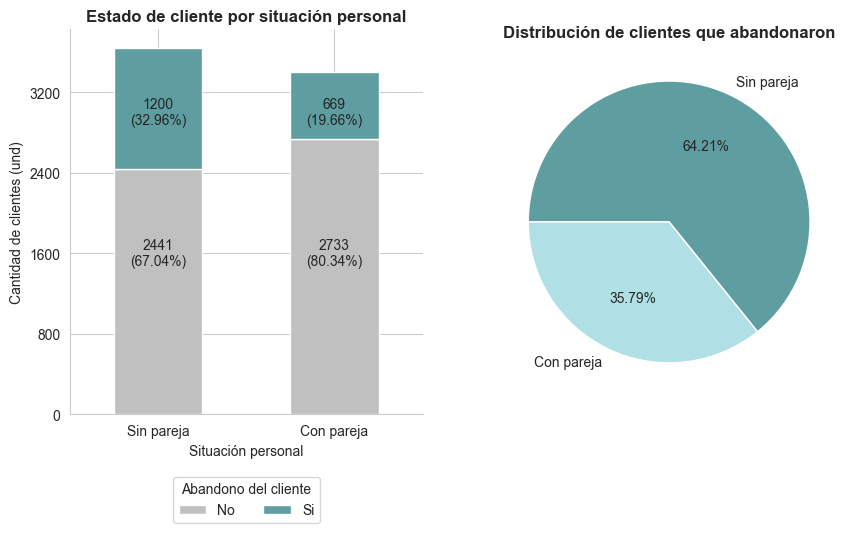

In [579]:
# Realizar las gráficas de abandono por situación personal del cliente

# Estilo de la gráfica
sns.set_style('whitegrid')

# Creación del lienzo con 2 gráficas
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))


# Realizar la gráfica de barras apiladas
df_abandono_cliente_pareja1.plot(kind='bar', stacked=True, color=['silver', 'cadetblue'], ax=ax1)

# Configurar el título y los ejes
ax1.set_title('Estado de cliente por situación personal', weight='bold')
ax1.set_ylabel('Cantidad de clientes (und)')
ax1.set_yticks([0, 800, 1600, 2400, 3200])
ax1.tick_params(axis='x', labelrotation=0)

# Obtención y configuración de los spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Anotaciones
# Valores de las barras
for i in range(len(df_abandono_cliente_pareja.index)):
    ax1.text(x=i, 
            y=1600, 
            s=f'{df_abandono_cliente_pareja['No'].iloc[i]}\n({round(100 - df_abandono_cliente_pareja['%_abandono_pareja'].iloc[i], 2)}%)',
            ha='center',
            va='center'
            )

for i in range(len(df_abandono_cliente_pareja.index)):
    ax1.text(x=i, 
            y=3000, 
            s=f'{df_abandono_cliente_pareja['Si'].iloc[i]}\n({df_abandono_cliente_pareja['%_abandono_pareja'].iloc[i]}%)',
            ha='center',
            va='center'
            )

# Configuración de la leyenda
ax1.legend(title='Abandono del cliente',loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2)


# Gráfico de torta
colores= []
for indice in df_abandono_cliente_pareja.index:
    if indice == 'Sin pareja':
        colores.append('cadetblue')
    else:
        colores.append('powderblue')

ax2.pie(df_abandono_cliente_pareja['%_abandono_total'], labels=df_abandono_cliente_pareja.index, autopct='%1.2f%%', colors=colores, counterclock=False, startangle=180)

ax2.set_title('Distribución de clientes que abandonaron', weight='bold')


plt.show()

- Los clientes que más abandonaron los servicios tanto en cantidad como en proporción, son los clientes que no tienen pareja.
- Se debe revisar si hay paquetes familiares que tengan mayores beneficios que paquetes individuales.

In [582]:
# Visualización de df_abandono_cliente_hijos
df_abandono_cliente_hijos

Abandono,No,Si,%_abandono_total,%_abandono_hijos
Situación parental,,,,
Sin hijos,3390,1543,82.56,31.28
Con hijos,1784,326,17.44,15.45


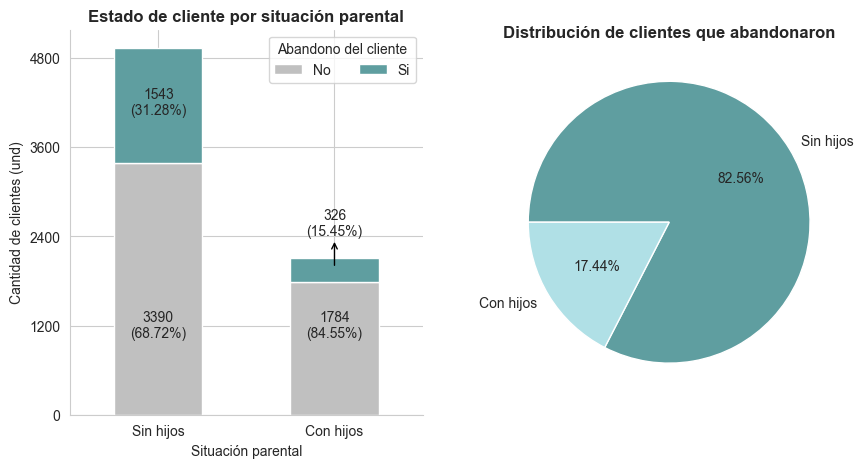

In [590]:
# Realizar las gráficas de abandono por situación parental del cliente

# Estilo de la gráfica
sns.set_style('whitegrid')

# Creación del lienzo con 2 gráficas
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))


# Realizar la gráfica de barras apiladas
df_abandono_cliente_hijos1.plot(kind='bar', stacked=True, color=['silver', 'cadetblue'], ax=ax1)

# Configurar el título y los ejes
ax1.set_title('Estado de cliente por situación parental', weight='bold')
ax1.set_ylabel('Cantidad de clientes (und)')
ax1.set_yticks([0, 1200, 2400, 3600, 4800])
ax1.tick_params(axis='x', labelrotation=0)

# Obtención y configuración de los spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Anotaciones
# Valores de las barras
for i in range(len(df_abandono_cliente_hijos.index)):
    ax1.text(x=i, 
            y=1200, 
            s=f'{df_abandono_cliente_hijos['No'].iloc[i]}\n({round(100 - df_abandono_cliente_hijos['%_abandono_hijos'].iloc[i], 2)}%)',
            ha='center',
            va='center'
            )

for i in range(len(df_abandono_cliente_hijos.index)):
    if i == 0:
        ax1.text(x=i, 
                y=4200, 
                s=f'{df_abandono_cliente_hijos['Si'].iloc[i]}\n({df_abandono_cliente_hijos['%_abandono_hijos'].iloc[i]}%)',
                ha='center',
                va='center'
                )
    else:
        ax1.annotate(text=f'{df_abandono_cliente_hijos['Si'].iloc[i]}\n({df_abandono_cliente_hijos['%_abandono_hijos'].iloc[i]}%)',
                xy=(i,df_abandono_cliente_hijos['No'].iloc[i] + df_abandono_cliente_hijos['Si'].iloc[i] - 100),
                xytext=(i,df_abandono_cliente_hijos['No'].iloc[i] + df_abandono_cliente_hijos['Si'].iloc[i] + 300),
                ha='center',
                arrowprops=dict(arrowstyle="<-", color='black', shrinkA=0, shrinkB=0))

# Configuración de la leyenda
ax1.legend(title='Abandono del cliente',loc='upper right', ncol=2)


# Gráfico de torta
colores= []
for indice in df_abandono_cliente_hijos.index:
    if indice == 'Sin hijos':
        colores.append('cadetblue')
    else:
        colores.append('powderblue')

ax2.pie(df_abandono_cliente_hijos['%_abandono_total'], labels=df_abandono_cliente_hijos.index, autopct='%1.2f%%', colors=colores, counterclock=False, startangle=180)

ax2.set_title('Distribución de clientes que abandonaron', weight='bold')


plt.show()

- Los clientes que más abandonaron los servicios tanto en cantidad como en proporción, son los clientes que no tienen hijos.
- Se debe revisar si hay paquetes familiares que tengan mayores beneficios que paquetes individuales.

In [594]:
# Visualización de df_abandono_cliente_antiguedad
df_abandono_cliente_antiguedad

Abandono,No,Si,%_abandono_total,%_abandono_antiguedad
Meses de antiguedad,,,,
0-5,627,744,39.81,54.27
6-10,375,224,11.99,37.40
11-15,332,168,8.99,33.60
16-21,339,132,7.06,28.03
22-26,326,101,5.40,23.65
27-31,266,72,3.85,21.30
32-36,266,70,3.75,20.83
37-41,245,69,3.69,21.97
42-46,263,53,2.84,16.77


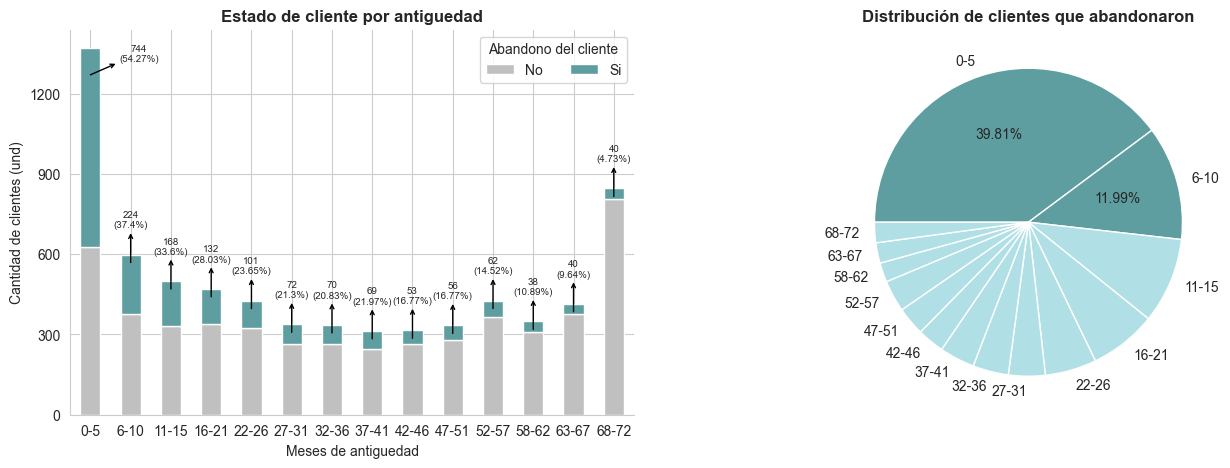

In [613]:
# Realizar las gráficas de abandono por antiguedad del cliente

# Estilo de la gráfica
sns.set_style('whitegrid')

# Creación del lienzo con 2 gráficas
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,5))


# Realizar la gráfica de barras apiladas
df_abandono_cliente_antiguedad1.plot(kind='bar', stacked=True, color=['silver', 'cadetblue'], ax=ax1)

# Configurar el título y los ejes
ax1.set_title('Estado de cliente por antiguedad', weight='bold')
ax1.set_ylabel('Cantidad de clientes (und)')
ax1.set_yticks([0, 300, 600, 900, 1200])
ax1.tick_params(axis='x', labelrotation=0)

# Obtención y configuración de los spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Anotaciones
# Valores de las barras

for i in range(len(df_abandono_cliente_antiguedad.index)):
    if i == 0:
        ax1.annotate(text=f'{df_abandono_cliente_antiguedad['Si'].iloc[i]}\n({df_abandono_cliente_antiguedad['%_abandono_antiguedad'].iloc[i]}%)',
                xy=(i,df_abandono_cliente_antiguedad['No'].iloc[i] + df_abandono_cliente_antiguedad['Si'].iloc[i] - 100),
                xytext=(i + 1.2,df_abandono_cliente_antiguedad['No'].iloc[i] + df_abandono_cliente_antiguedad['Si'].iloc[i]-50),
                ha='center',
                fontsize=7,
                arrowprops=dict(arrowstyle="<-", color='black', shrinkA=0, shrinkB=0))
    else:
        ax1.annotate(text=f'{df_abandono_cliente_antiguedad['Si'].iloc[i]}\n({df_abandono_cliente_antiguedad['%_abandono_antiguedad'].iloc[i]}%)',
                xy=(i,df_abandono_cliente_antiguedad['No'].iloc[i] + df_abandono_cliente_antiguedad['Si'].iloc[i] - 30),
                xytext=(i,df_abandono_cliente_antiguedad['No'].iloc[i] + df_abandono_cliente_antiguedad['Si'].iloc[i] + 100),
                ha='center',
                fontsize=7,
                arrowprops=dict(arrowstyle="<-", color='black', shrinkA=0, shrinkB=0))

# Configuración de la leyenda
ax1.legend(title='Abandono del cliente',loc='upper right', ncol=2)


# Gráfico de torta
colores= []
for indice in df_abandono_cliente_antiguedad.index:
    if indice == '0-5' or indice == '6-10':
        colores.append('cadetblue')
    else:
        colores.append('powderblue')

def autopct_condicional(pct):
    return f'{pct:.2f}%' if pct > 10 else ''

ax2.pie(df_abandono_cliente_antiguedad['%_abandono_total'],  labels = df_abandono_cliente_antiguedad.index, autopct=autopct_condicional, colors=colores, counterclock=False, startangle=180)

ax2.set_title('Distribución de clientes que abandonaron', weight='bold')


plt.show()

- El 51.8% de los abandonos han sido realizados por clientes con antiguedad menor a 1 año.
- Entre más antiguos son los clientes, menor tasa de abandono hay.

De los análisis realizados, se puede decir que el perfil del cliente que abandona los servicios es ser de una edad menor a 65 años, soltero, sin hijos y con una antiguedad menor a un año como cliente.

## 4. CONCLUSIONES

## 5. RECOMENDACIONES

- Tener información sobre quejas de los clientes o índice de satisfacción de los servicios.
- ¿Programa de fidelización / descuentos a los clientes con mayor tiempo?